In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import seaborn as sns
import pandas as pd


/tmp/ipykernel_192323/2518663876.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
# ************  Config  *******************
layer = 1
component = 'O'
neuron_id = 308
do = 'High-overlap'
class_names = ['contradiction','entailment','neutral']

In [11]:
# read distributions

dist_path = f'../pickles/distributions/L{layer}_{do}_{component}_{neuron_id}.pickle'

with open(dist_path, 'rb') as handle: 
    class_ratios = pickle.load(handle)
    mean = pickle.load(handle)
    median = pickle.load(handle)
    print(f'loading from  : {dist_path}')

loading from  : ../pickles/distributions/L1_High-overlap_O_308.pickle


In [12]:
class_ratios['contradiction'].shape
label_maps = {"contradiction": 0 , "entailment" : 1, "neutral": 2}
df = {}
raw = {}

for label in class_names:

    raw[label] = {}
    
    for cur_set in class_names:  

        raw[label][cur_set] = class_ratios[cur_set][:,label_maps[label]].tolist()
    
    df[label] = pd.DataFrame.from_dict(raw[label])

In [13]:
df[label]

,contradiction,entailment,neutral
0,21.905344,1.556131,0.688824
1,222.120071,0.603180,1.719081
2,70.347733,29.740091,0.963549
3,2.100892,15.389645,170.349518
4,5.145550,0.992842,0.540534
...,...,...,...
95,25.360806,4.100242,0.985299
96,2.261215,1.727290,0.943281
97,5.359062,65.952271,0.961262
98,4.262461,16.715742,0.624764


In [14]:
df[label]['contradiction'].max()

562.800537109375

In [15]:
df.keys()

dict_keys(['contradiction', 'entailment', 'neutral'])

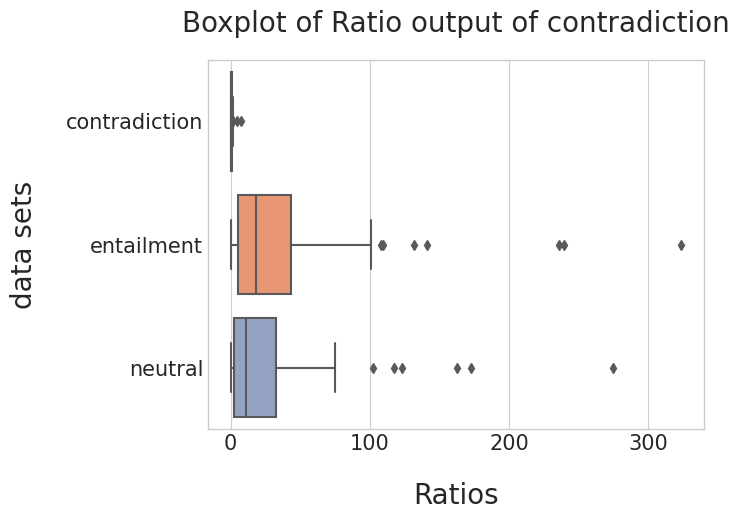

In [22]:
# Todo: plot 
#create the plot
label = 'contradiction'
ax = sns.boxplot(data = df[label], orient = "h", palette = "Set2")
# #add labels
ax.set_xlabel("Ratios", fontsize = 20, labelpad = 20)
ax.set_ylabel("data sets", fontsize = 20, labelpad = 20)
ax.set_title(f"Boxplot of Ratio output of {label}", fontsize = 20,pad = 20)
# #edit ticks
ax.tick_params(which = "both", labelsize = 15)

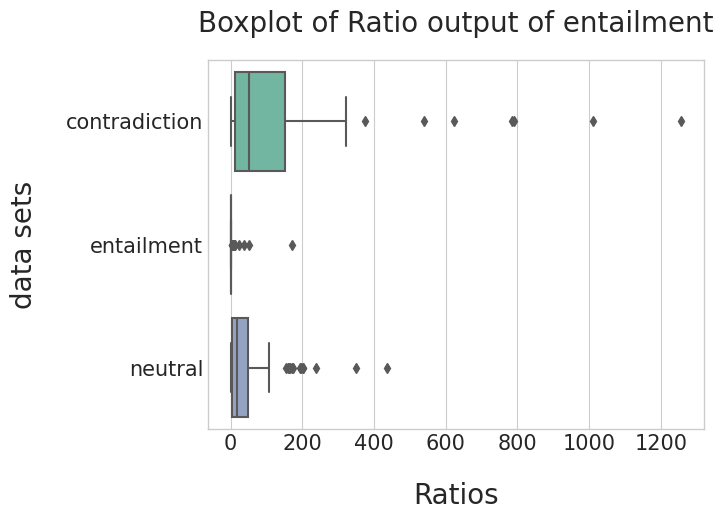

In [23]:
# Todo: plot 
#create the plot
label = 'entailment'
ax = sns.boxplot(data = df[label], orient = "h", palette = "Set2")
# #add labels
ax.set_xlabel("Ratios", fontsize = 20, labelpad = 20)
ax.set_ylabel("data sets", fontsize = 20, labelpad = 20)
ax.set_title(f"Boxplot of Ratio output of {label}", fontsize = 20,pad = 20)
# #edit ticks
ax.tick_params(which = "both", labelsize = 15)

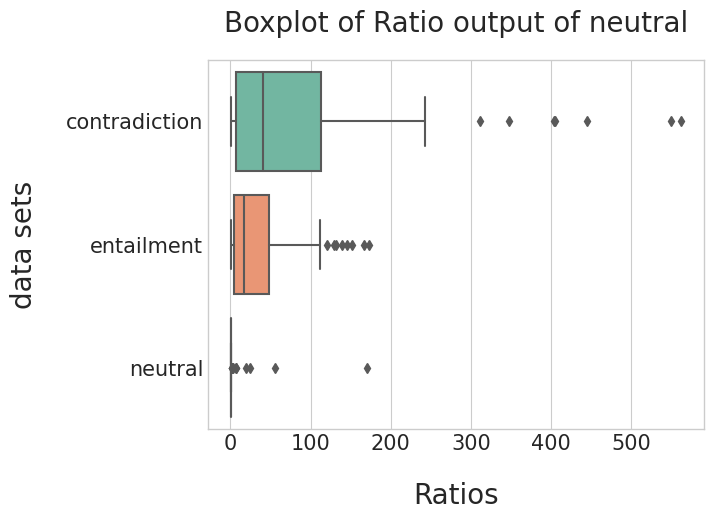

In [24]:
# Todo: plot 
#create the plot
label = 'neutral'
ax = sns.boxplot(data = df[label], orient = "h", palette = "Set2")
# #add labels
ax.set_xlabel("Ratios", fontsize = 20, labelpad = 20)
ax.set_ylabel("data sets", fontsize = 20, labelpad = 20)
ax.set_title(f"Boxplot of Ratio output of {label}", fontsize = 20,pad = 20)
# #edit ticks
ax.tick_params(which = "both", labelsize = 15)